적대적 훈련을 소개, 점차 복잡한 GAN을 구성해본다. 

처음엔 간단한 1010 패턴에 대해 알어보고, 손으로 쓴 단색 숫자 이미지를 거쳐 마지막으로 풀컬러 얼굴 이미지로 학습한다.

## Chapter 5 GAN 개념

### 이미지 생성하기

신경망은 기본적으로 정보를 감소, 정제, 축약하는데 사용된다. MNIST classifier에서는 784개 값을 입력으로 받아 10개의 출력으로 변환하였는데 처음보다 정보량이 감소하였다.

반대로 MNIST classifier의 네트워크를 반대로 뒤집는다면, 이는 값을 감소시키는 것이 아닌 사이즈가 큰 데이터로 변환하는 것일 것이다. 이경우에는 Label을 주면 신경망을 통해 이미지가 생성되는 것이다. 

하나의 숫자를 표현하는 one-hot encoding vector를 이미 훈련된 네트워크에 넣어서 그 숫자에 맞는 이상적인 이미지를 거꾸로 만드는 것을 **백쿼리(역질의, backquery)** 라고 부른다.

백쿼리를 통해 만들어진 이미지의 특징

- 같은 one-hot encoding vector면 같은 결과를 출력

- 그 label을 나타내는 모든 훈련 데이터의 뭔가 평균적인 이미지가 나온다.

네트워크 모델을 이용해 원하는 이상적인 결과

- 각각 서로 다른 이미지를 만들어낸다.

- 평균처럼 애매모호한 이미지가 아니라 훈련 샘플처럼 보이는 이미지를 만든다.

위 두 가지 목표를 달성하는 것은 **사실적**이고 그럴듯한 이미지 생성에 중요
(간단한 백쿼리로는 이 목적을 달성 불가, 다른 네트워크 구조 필요)

### 적대적 훈련

2014년 굿펠로는 다른 종류의 네트워크 구조를 발표, 기존의 크거나, 넓거나, 깊은 신경망 버전도 아니고 당시 유행하는 활성화 함수나 진보한 최적화 기법을 사용한 것도 아니였다.

구조적으로 다른 신경망을 발표

진짜 고양이 사진인지 아니면 손으로 그린 만화 고양이인지 분류하는 경우를 생각해 보면 신경망은 종류가 서로 다른 두 이미지를 분류하도록 훈련할 것이다. 

분류기를 일종의 "탐정"이라고 생각하면 된다. 훈련 전에는 탐정은 주어진 이미지가 진짜 고양이인지 가짜 고양이인지 정확하게 가려낼 수 없다. 하지만 훈련을 거듭하면 실제 고양이와 가짜 고양이를 잘 구별할 수 있다. 

다음으로 가짜 이미지를 생성해주는 장치가 있다면 가짜 이미지를 준비하는 과정이 필요없다. 
고양이처럼 안 보이는 조잡한 이미지를 만들어내는 것은 어렬운 일이 아니다. 예를 들면 임의로 대충 삼각형 같은 것을 그려도 되기 때문이다. 이 경우 탐정은 쉽게 이를 분류할 수 있을 것이다. 

하지만, 대충 이미지를 만드는 생성기가 아니라 진짜 그럴듯한 이미지를 생성하는 신경망을 **생성기(generator)** 라고 부른다.

그리고 분류기는 **판별기(Discriminator)** 라고 부른다.

생성기, 판별기는 이러한 구조의 네트워크 모델에서 관습적으로 불리는 이름들이다.

그럴듯한 이미지를 만드는 신경망인 **생성기** 를 어떻게 훈련할까?

훈련 과정은 어떻게 보상을 주고 어떻게 벌을 줄지 대한 과정이다. **손실함수** 가 그 역할을 한다. 

- 판별기(Discriminator)를 무사히 속이면 생성기에게 보상을 준다.

- 판별기에 잡히면 생성기에 벌을 준다.

(판별기의 결과에 따라 생성기에게 보상과 벌을 준다.)

다시 정리하면, 생성기는 그럴듯한 이미지를 만드는 것이고 판별기는 생성기가 생성한 가짜 이미지와 진짜 이미지를 구분하는 것이다.

생성기의 성능이 좋지 않다면, 판별기가 쉽게 판단할 것이다. 하지만 생성기를 계속 훈련시키면 점차 진짜와 별 구분이 안되는 이미지를 만들어낼 것이다. 

판별기가 훈련을 통해 성능이 좋아질수록 생성기 역시 보상과 벌을 통해 훈련이 되어 성능이 좋아질 것이다. **궁극적으로 생성기는 진짜 이미지와 분간이 어려운 이미지를 만들기 시작할 것이다.**

이렇게 판별기와 생성기는 서로 적대적 관계로 경쟁을 하게 되며, 서로를 뛰어넘으려고 노력하기에 결과적으로 둘 다 성능이 좋아지게 된다. 이러한 구조를 **생성적 적대 신경망(Generative Adversarial Network), GAN이다.**

**단순히 경쟁을 통해 발전을 한다는 아이디어가 좋은게 아니라, 진짜 이미지를 판별하기 위해 어떤 방식을 따르고 어떤 손실함수를 거쳐야 하는지 등 자세하게 설정하지 않아도 된다는 것이다.** 


### GAN 훈련

**GAN은 생성기와 판별기를 모두 훈련한다.** 

**주의**할 것은 둘 중 하나만 먼저 훈련하고 같은 데이터로 다시 한번 다른 모델을 훈련하는 것은 하면 안된다. 제대로 훈련하기 위해서는 둘 모두 동시에 훈련시키면서 양쪽 모두 비슷한 수준으로 훈련이 이뤄지게 유도해야한다.


**GAN 핵심 훈련 방법**
- 1단계: 판별기에 실제 데이터를 보여주고 1.0이라는 값이어야 한다고 알려준다.
- 2단계: 판별기에 생성기로부터 만들어진 가짜 데이터를 보여주고 0.0이어야 한다고 알려준다.
- 3단계: 판별기에 생성기의 결과를 보여주고, 생성기에 결과가 1.0이어야 한다고 알려준다.

1단계:

**실제 데이터에서 나온 이미지**를 **판별기**에게 보여주고 분류한다. 결과는 1.0이 되어야 하고, 오차가 발생하면 **이를 판별기를 업데이트하는데 사용한다.**

2 단계:

판별기를 훈련하지만, **생성기에서 나온 이미지**를 보여준다. 결과는 0.0이어야 한다. 그리고 오차를 통해 **판별기만 업데이트한다.** 생성기를 업데이트하면 안된다. 

3 단계:

**생성기를 훈련**한다. 생성기는 판별기가 분류할 이미지를 생성하는 역할을 하고, 목적은 만든 이미지에 대해 판별기의 결과가 1.0이 되도록 하는 것이다. 즉 생성기가 판별기를 속여 진짜처럼 분류하게 하는 것이다. **오차는 생성기만을 업데이트**하는 데 사용된다.


### 훈련하기 어려운 GAN

실전에서 GAN을 훈련하는 것은 까다로울 수 있다. 생성기와 판별기가 서로 적대적인 관계로 발전했을 때, 두 개의 성능의 **균형**이 중요하다. 한쪽의 성능이 너무 빨리 좋아지면 다른 한쪽이 이를 따라잡지 못할 수 있다. 

GAN은 머신러닝에서 상당히 새로운 학습 방법이다. 제대로 학습이 이뤄지는 건지, 혹은 무엇이 훈련을 실패하게 하는건지 알려진게 많지 않다. 

### Summary

- **분류**는 데이터를 감소시키는 것에서 출발한다. 신경망을 통해 분류를 한다는 것은, 입력값을 줄여 클래스당 하나의 출력값을 가지게 하는 것이다.

- **생성**은 데이터를 확장하여 얻어내는 것이다. 생성적 신경망은 작은 수의 시드를 훨씬 큰 크기를 가지는 출력값으로 확장하는 역할을 한다.

- **생성적 적대 신경망(GAN)**은 두 개의 신경망 모델을 포함한다. 두 신경망은 각 각 **생성기, 판별기**이다. 판별기는 훈련 데이터셋을 진짜라고 예측하게 훈련을 하고, 생성기에서 생성된 이미지를 가짜라고 예측하게끔 훈련한다. 생성기는 판별기를 속일 수 있는 데이터를 속일 수 있는 데이터를 만드는 데 집중한다.

- GAN이 왜 잘되는지 연구가 성숙하지 않았다.

- GAN 훈련 3단계
    - 1. 판별기를 실제 데이터로 훈련
    - 2. 판별기로 생성된 데이터로 훈련
    - 3. 판별기를 속일 수 있도록 생성기를 훈련


## Chapter 6 단순한 1010 패턴

1010패턴 형식의 값을 생성하는 GAN 구현을 통해 GAN 코드가 일반적으로 어떻게 구성되고 어떻게 학습을 하는지 보자













In [ ]:
import random
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt

### 실제 데이터 소스

In [ ]:
def generate_real():
    # real_data = torch.FloatTensor([1,0,1,0])  # 실제 데이터는 정확히 딱 떨어지는 값일 확률이 거의 없다.
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),  # 0.8 ~ 1.0 사이의 임의의 값을 가진다.
        random.uniform(0.0, 0.2),  # 0.0 ~ 0.2 사이의 임의의 값을 가진다.
        random.uniform(0.8, 1.0),
        random.uniform(0.0, 0.2)])
    return real_data

In [ ]:
generate_real()

tensor([0.8953, 0.0289, 0.8831, 0.1288])

### 판별기 만들기

In [ ]:
import pandas

class Discriminator(nn.Module):
    def __init__(self):
        # Initialize torch super class
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        self.loss = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=["loss"])
        df.plot(ylim=(0.0, 1.0), figsize=(16, 8), alpha=0.1, marker=".",
                grid=True, yticks=(0.0, 0.25, 0.5))
        pass

### 판별기 테스트하기

임의의 노이즈 패턴을 반환하는 함수를 만들어보자

In [ ]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

generate_random(4)

tensor([0.6031, 0.5831, 0.6431, 0.5217])

- 1010 패턴 데이터는 진짜이므로 목표 출력을 1.0으로

- 임의의 노이즈 데이터는 가짜이므로 목표 출력을 0.0으로 

In [ ]:
D = Discriminator()

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000


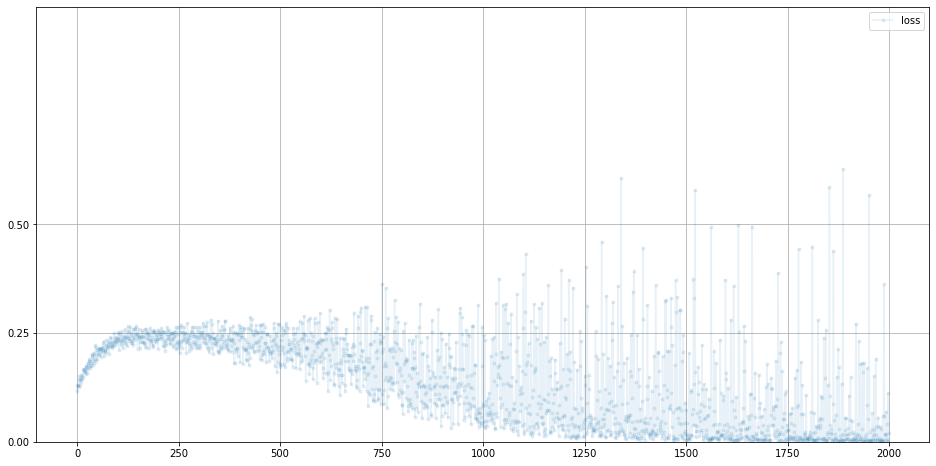

In [ ]:
D.plot_progress()

In [ ]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

0.8408324718475342
0.3212847411632538


지금까지는 실제 데이터에서 나오는 패턴과 가짜 데이터에서 나오는 패턴을 넣었을 때 결과가 다른지 확인하는 것이였다. 

### 생성기 만들기

생성기는 단순한 함수가 아니라 훈련을 필요로 하는 신경망이다. 현재 예제에서는 마지막 출력 레이어는 실제 데이터와 일치하도록 네 개의 노드가 필요하다.

히든 레이어의 크기는 정해진 것은 없지만 학습 시간을 길게 하지 않기 위해서는 큰 신경망은 지양하자. 생성기와 판별기가 학습의 균형을 이루기 위해서 많은 연구자들은 판별기를 복사해서 작업을 시작하곤 한다.

입력 레이어 노드는 한개, 은닉 레이어 노드는 3개, 출력 레이어 노드는 4개인 생성기로 시작해보자.(판별기와는 반대)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss(d_output, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
            df = pandas.DataFrame(self.progress, columns=['loss'])
            df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
            pass

생성기에는 loss가 없다 왜냐하면 이 과정이 필요가 없기 때문이다. GAN 훈련 반복문을 보면 손실함수는 오직 판별기의 결과에만 적용된다는 것을 볼 수 있다. **생성기는 판별기로부터 흘러온 기울기 오차를 통해 업데이트가 된다.**

In [ ]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.5304, 0.6211, 0.2789, 0.4749], grad_fn=<SigmoidBackward>)

### GAN 훈련하기

In [ ]:
%%time

D = Discriminator()
G = Generator()

image_list = []

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(G.forward(torch.Tensor([0.5])).detach(), torch.FloatTensor([0.0]))
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

    if (i % 1000 == 0):
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

counter =  10000
counter =  20000
CPU times: user 16.9 s, sys: 43.5 ms, total: 17 s
Wall time: 16.9 s


새로운 판별기와 생성기 객체를 만든다. 

1단계에서는 판별기가 실제 데이터에 대해 훈련한다.

2단계에서는 생성기에서 비롯된 패턴을 통해 판별기를 학습시킨다. detach()는 생성기의 출력에 적용되어 계산 그래프에서 생성기를 떼어내는 역할을 한다. 

3단계에서는 생성기를 훈련하고 생성기의 입력값은 0.5로 설정한 후 판별기 객체에 전달하는 단계이다. 

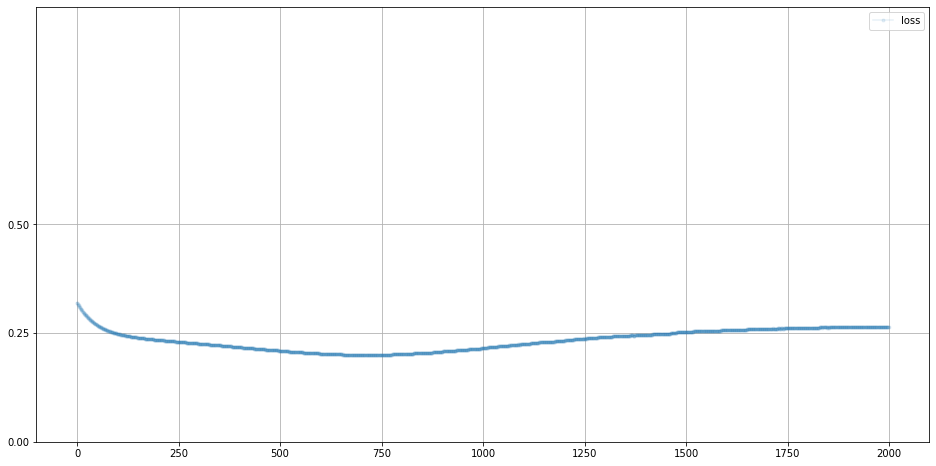

In [ ]:
D.plot_progress()

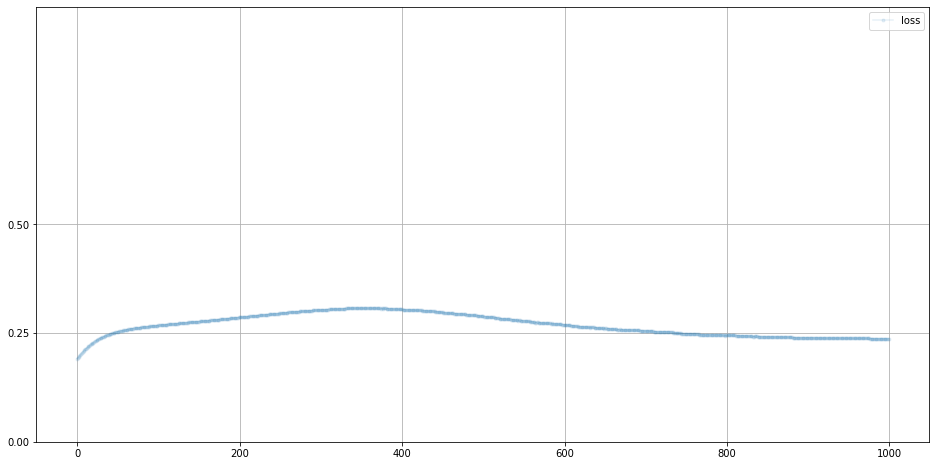

In [ ]:
G.plot_progress()

In [ ]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9372, 0.0455, 0.9281, 0.0694], grad_fn=<SigmoidBackward>)

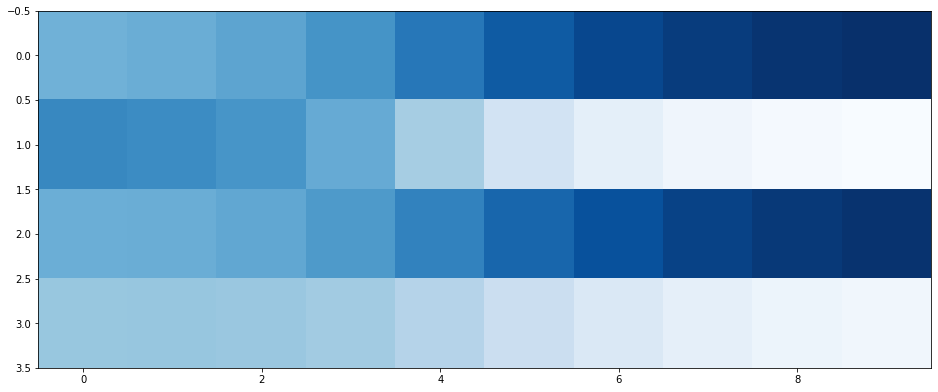

In [ ]:
import numpy
plt.figure(figsize=(16, 8))
plt.imshow(numpy.array(image_list).T, interpolation="none", cmap='Blues')

생성기가 훈련 데이터를 직접 본 적이 없는데도 실제 데이터와 유사한 패턴을 만들어냈다.

### Summary

- GAN을 훈련하는 좋은 방법은 아래 단계에 맞춰 훈련하는 것이다.
    - 1. 실제 데이터셋을 미리 살펴본다.
    - 2. 판별기가 적어도 실제 데이터와 임의의 노이즈를 구별하도록 학습할 수 있을 성능은 지니는지 확인한다.
    - 3. 훈련되지 않은 생성기가 올바른 형태의 데이터를 만들어내는지 확인한다.
    - 4. 손실이 어떻게 변하는지 시각화한다.

- 잘 훈련된 GAN은 생성된 가짜 이미지와 실제 이미지를 잘 구별하지 못하는 상태이다. 즉 출력은 0.5로서 0.0 ~ 1.0의 중간에 해당하는 값이다. 평균제곱오차의 아상적인 값은 0.25이다. 

- 생성기와 판별기를 각각 따로 시각화하는 것은 유용하다. **생성기의 손실은 생성된 데이터로 부터 발생한 판별기의 손실이다.**

## Chapter 7 손으로 쓴 숫자 훈련

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import numpy, pandas, random
import matplotlib.pyplot as plt

### 데이터셋 클래스

In [ ]:
class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # 0 ~ 255의 이미지를 0 ~ 1로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0
        
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
        plt.title("label = " + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation="none", cmap="Blues")
        pass
    
    pass

In [ ]:
mnist_dataset = MnistDataset('./drive/MyDrive/workspace/GAN/GAN 첫걸음/mnist_data/mnist_train.csv')

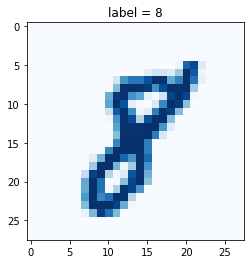

In [ ]:
mnist_dataset.plot_image(17)

In [ ]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

### MNIST 판별기

In [ ]:
class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass


### 판별기 테스트하기

In [ ]:
D = Discriminator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(generate_random(784), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


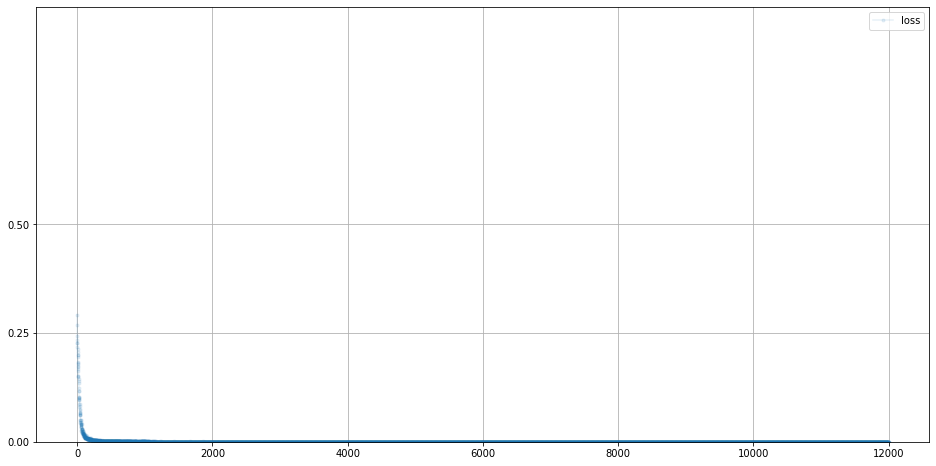

In [ ]:
D.plot_progress()

In [ ]:
# 훈련된 판별기에 임의로 선택한 이미지를 수동으로 넣어 결과를 확인
for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0, 60000)][1]
    print(D.forward(image_data_tensor).item())
    pass

for i in range(4):
    print(D.forward(generate_random(784)).item())
    pass

0.993044912815094
0.9772217273712158
0.9962120056152344
0.9899356961250305
0.004863541107624769
0.005760495085269213
0.004286642652004957
0.006735508795827627


### MNIST 생성기

생성기는 MNIST 데이터셋과 같은 형식으로 데이터를 만들어야 한다. 생성기가 생성한 이미지는 28 x 28 크기이며, 총 784개의 픽셀 값을 가져야한다.

판별기를 뒤집어놓은 형태부터 출발

- 출력: 784개 노드
- 히든 레이어: 200개 
- 입력 레이어: 1개


생성기는 훈련 데이터의 여러 양상을 다양하게 반영하도록 이미지를 생성해야한다.
실제 숫자로 보이는 이미지들을 생성해야 한다. 
신경망은 같은 입력에 대해 언제나 같은 출력을 낸다. 훈련 과정 자체에 어느 정도 임의적인 요소는 있을 수 있으나, 같은 입력값에 대해 항상 같은 출력을 낸다. 

이는 생성기의 입력으로 상수가 들어가면 안된다는 점을 뜻한다. 매 훈련 사이클마다 임의적인 입력을 사용하면 된다. **임의의 시드(random seed)**에서 숫자를 생성하여 입력으로 넣자!

이렇게 시드를 이용해서 생성기의 입력으로 넣어주면 입력이 조금씩 달라져 조금씩 다른 숫자가 다양한 이미지를 생성하는 데 도움을 준다고 볼 수 있다. 

In [ ]:
class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.Sigmoid(),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        
        # create optimiser, simple stochastic gradient descent
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
        pass
    
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

### 생성기 결과 확인하기

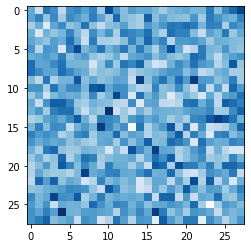

In [ ]:
G = Generator()

output = G.forward(generate_random(1))

img = output.detach().numpy().reshape(28,28)

plt.imshow(img, interpolation='none', cmap='Blues')

### GAN 훈련하기

In [ ]:
%%time 

D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(1)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random(1), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: user 3min 29s, sys: 2.52 s, total: 3min 32s
Wall time: 3min 31s


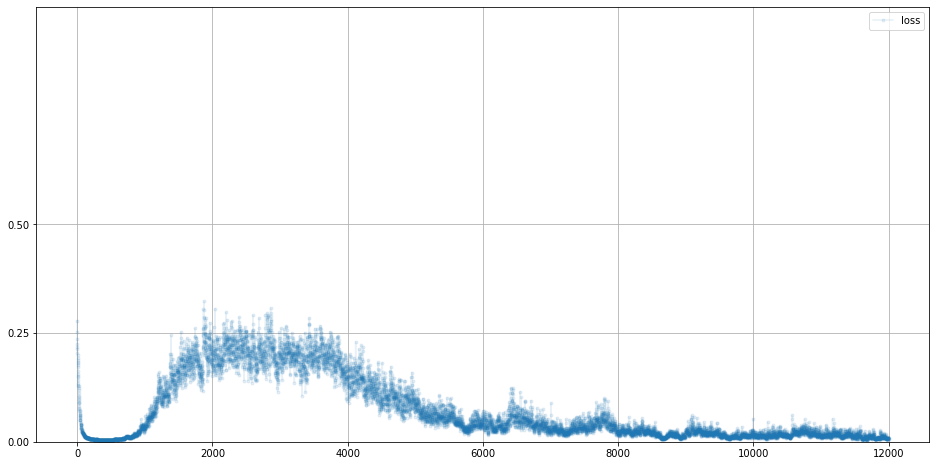

In [ ]:
D.plot_progress()

Loss가 0.25 정도를 보이면 판별기와 생성기의 성능 균형이 맞는 상태이다. 

하지만 loss가 0에 가깝게 나온다면, 생성기의 성능이 떨어져 판별기를 속일 수 없는 상태이다.

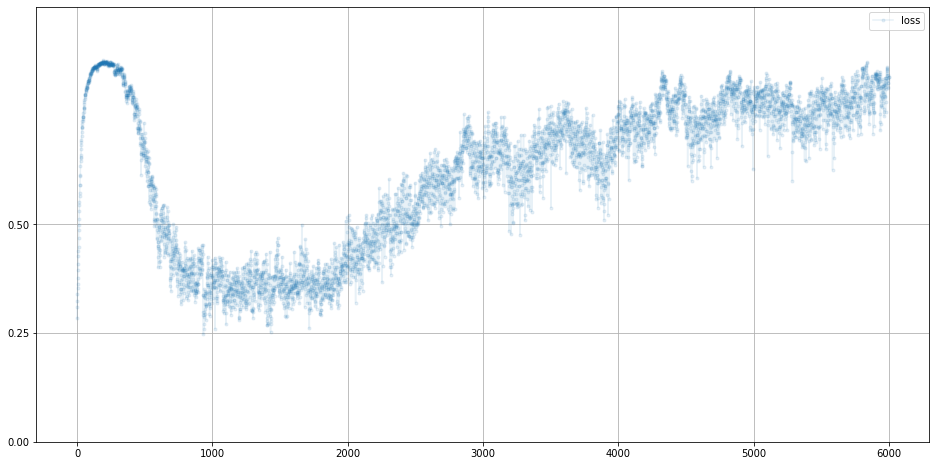

In [ ]:
G.plot_progress()

초기 loss가 치솟는데 이는 판별기가 생성기가 생성한 이미지를 잘 구별하기 때문이다. 이후 loss는 0.25 근처로 하락하여 판별기와 생성기간 균형이 잘 맞는 상태가 된다. 그리고 중반 이후 다시 loss가 상승하는데, 이는 판별기의 성능이 생성기보다 좋은 구간이다.

생성기가 생성한 이미지를 살펴보자. 다른 임의의 시드에서 다른 이미지가 생성되므로, 여러장을 봐보자

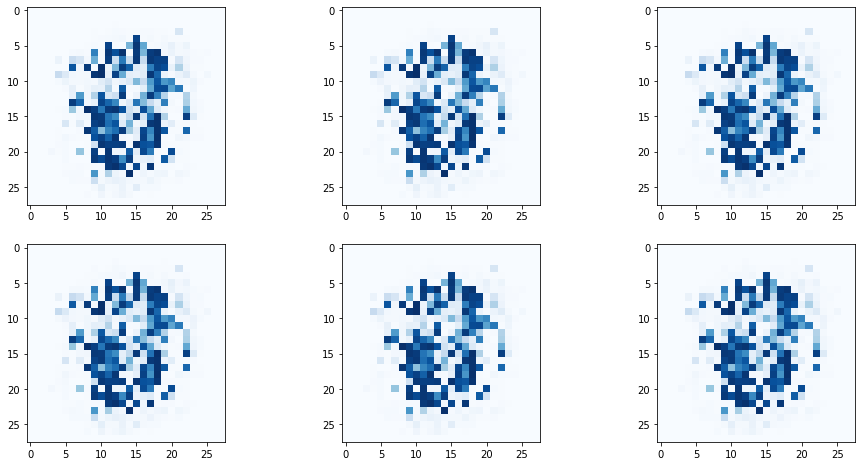

In [ ]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(1))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

학습전 임의의 시드를 갖고 생성한 이미지는 어떠한 형태가 없는 임의의 노이즈였다. 하지만, 학습 후 생성기가 만든 이미지는 어떤 형태를 갖고 있다.

### 모드 붕괴 (Mode collapse)

위 생성된 이미지를 보면 모두 똑같이 생겼다.(차이는 눈으로 식별하기 힘들다.)

이 현상은 GAN을 훈련할 때 자주 맞닥뜨리는 **모드 붕괴(mode collapse)** 현상이다.

생성기가 다양하게 생성하는 것이 바람직 하지만 **모드 붕괴가 일어나면 생성기는 오직 하나만을 만들게 되거나, 선택지의 극히 일부만 만들게 된다.**

모드 붕괴가 일어나는 현상에 대한 명확하게 이해된 바는 없다. 하지만 그럴듯한 이론은 생성기가 판별기보다 더 앞서간 후에 항상 실제에 가깝게 결과가 나오는 '꿀 지점'을 발견하여 그 이미지를 계속 만들어내게 된다는 것이다. 따라서 이 현상은 완화하기 위해서 판별기를 생성기보다 좀 더 자주 훈련시키는 것이다. 하지만 이 방법은 실제 효과는 없다고 알려져 있다. 

훈련의 양보다 질이 중요하다. 손실이 높아지는 구간에서 학습이 안된다는 것을 시각화를 통해 알 수 있다.

### GAN 훈련 성능 향상하기

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )

        self.loss = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0.0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0.0, 0.25, 0.5))
        pass

    pass

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200), 
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)

        loss = D.loss(d_output, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0.0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0.0, 0.25, 0.5))
        pass

    pass

In [ ]:
%%time

D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(1)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random(1), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: user 6min 22s, sys: 6.31 s, total: 6min 29s
Wall time: 6min 28s


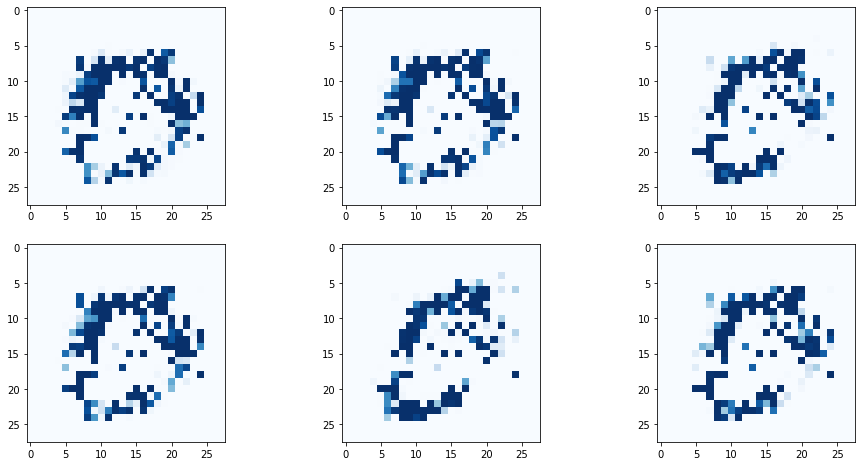

In [ ]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(1))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

LeakyReLU, LayerNorm, Adam으로 수정한 결과를 보면 이전 보다 조금 더 선명한 이미지를 갖게 되었다.

다음으로 입력 시드를 충분히 많은 숫자를 넣어서 GAN 구조를 향상시켜보자.

임의의 값으로 입력 노드를 100개를 만들어 보자.

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(100, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )

        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = [] 

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)

        loss = D.loss(d_output, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0.0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0.0, 0.25, 0.5))
        pass

    pass        

In [ ]:
%%time

D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(100)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random(100), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: user 6min 31s, sys: 6.54 s, total: 6min 37s
Wall time: 6min 37s


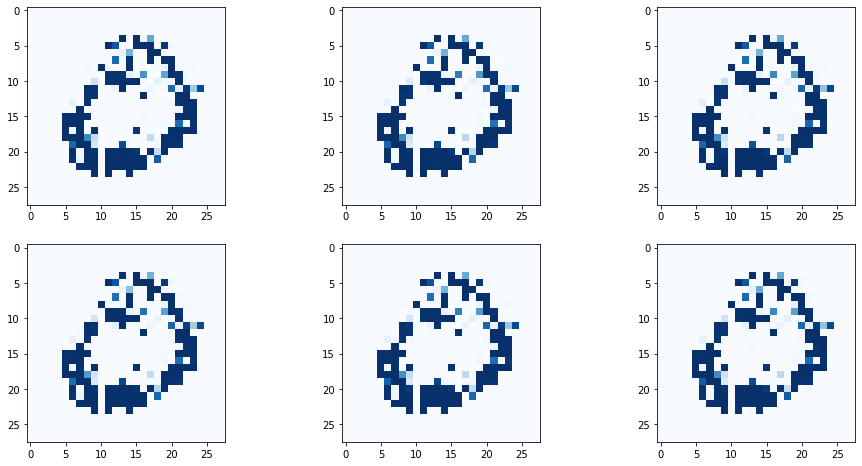

In [ ]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(100))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

이미지가 더 깨끗해지고 손으로 쓴 글씨 같아졌다. 0과 비슷해 보이는 이미지이다. 

- **판별기**에 입력되는, 임의의 이미지 픽셀 값은 0 ~ 1사이에서 고르게 선택해야 한다. 범위가 0 ~ 1인 이유는 이것이 실제 데이터셋에서 관찰되는 값이기 때문이다. 자연적으로 형성된 임의의 숫자에 대해 판별기의 성능을 테스트할 것이기 때문에 **값은 고르게 선택해야 하고 정규분포처럼 어떤 경향성을 지니면 안된다.**

- **생성기**에 투입되는 임의의 값은 0 ~ 1사이의 값이 아니어도 된다. 신경망에서 평균이 0이고 분산이 제한된 정규화된 값들이 학습에 유리하다는 것을 알고 있다. 생성기는 표준정규분포, 즉, 평균이 0이고 분산이 1인 분포에서 값을 뽑는 것이 유의하다고 볼 수 있다.


두 가지 임의 데이터를 뽑는 함수

In [ ]:
def generate_random_image(size):
    random_data = torch.rand(size)  # 균일한 확률분포로 난수 생성
    return random_data

In [ ]:
def generate_random_seed(size):
    random_data = torch.randn(size)  # 평균:0, 분산: 1인 표준정규분포를 따르는 난수를 생성
    return random_data

In [ ]:
%%time

D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: user 6min 27s, sys: 6.74 s, total: 6min 33s
Wall time: 6min 33s


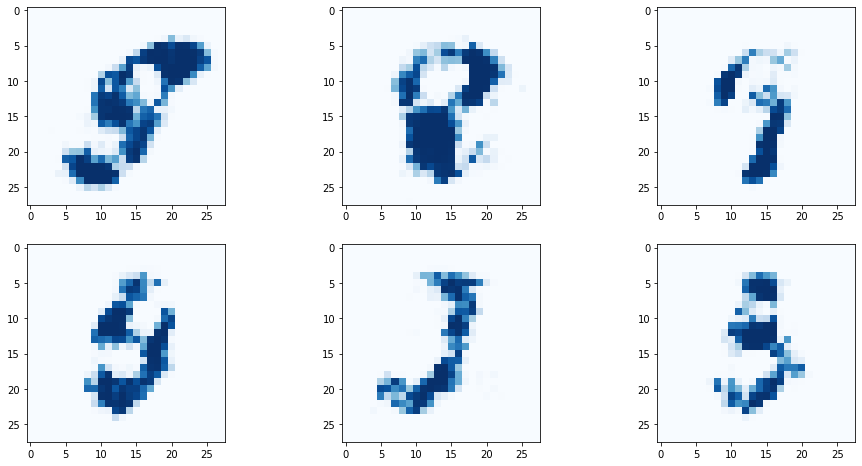

In [ ]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

임의의 시드를 사용해서 (시드의 개수를 늘리는 것을 통해) 여러 종류의 숫자를 만들 수 있게 되었다. 

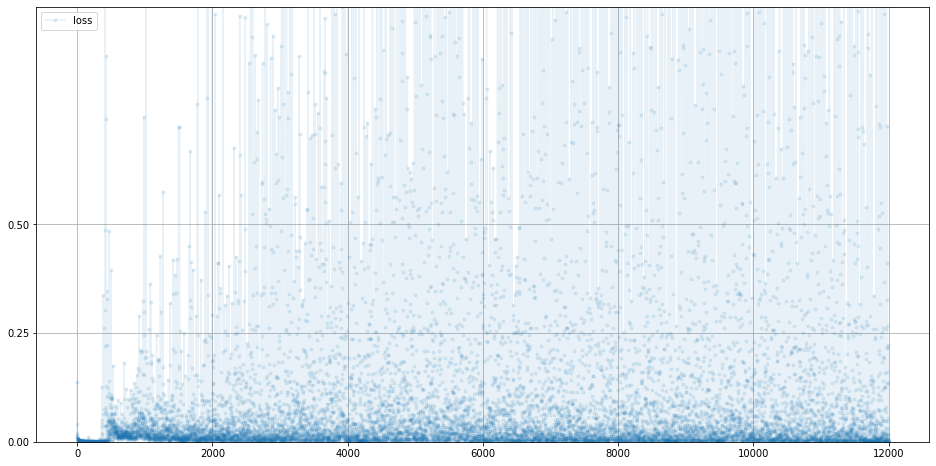

In [ ]:
D.plot_progress()

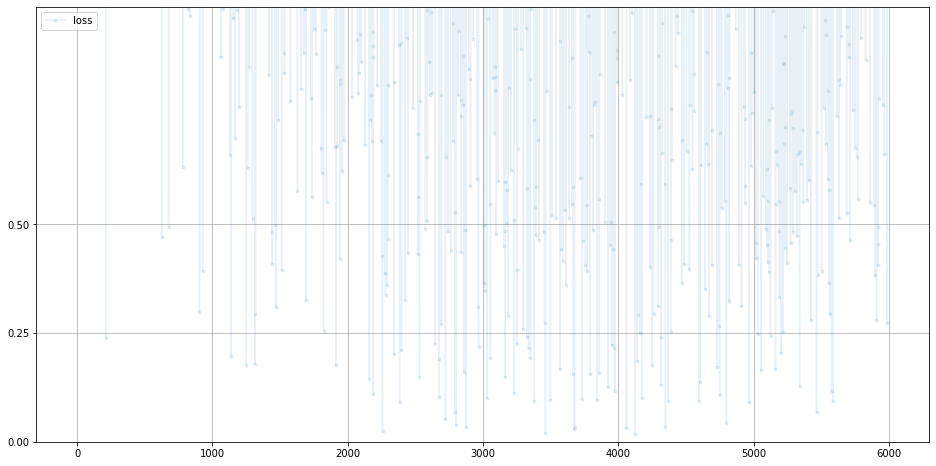

In [ ]:
G.plot_progress()

MSELoss() 와 다르게 BCELoss()의 최댓값은 1.0으로 제한되어 있지 않다.

판별기와 생성기가 균형점에 도달했을 때 BCELoss()가 어떤 값을 가져야하는가?

우리의 모델은 간단한 1010 GAN이다. 즉 균형점에 도달하는 모델임을 알고 있는 신경을 돌리면, 생성기과 판별기의 **손실 모두 0.69** 정도로 수렴한다.

이진 교차 엔트로피의 수학적인 정의에 의하면 아무 분류도 하지 못하는데 분류기를 통했을 때 예산되는 손실은 ln(2)이고, 이는 0.693과 같다. 

In [ ]:
%%time 

D = Discriminator()
G = Generator()

epochs = 4

for epoch in range(epochs):
    print ("epoch = ", epoch + 1)

    for label, image_data_tensor, target_tensor in mnist_dataset:
        D.train(image_data_tensor, torch.FloatTensor([1.0]))
        D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))
        G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))

epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch =  2
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
epoch =  3
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
epoch =  4
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
CPU times: user 25min 34s, sys: 24.4 s, total: 25min 58s
Wall time: 25min 55s


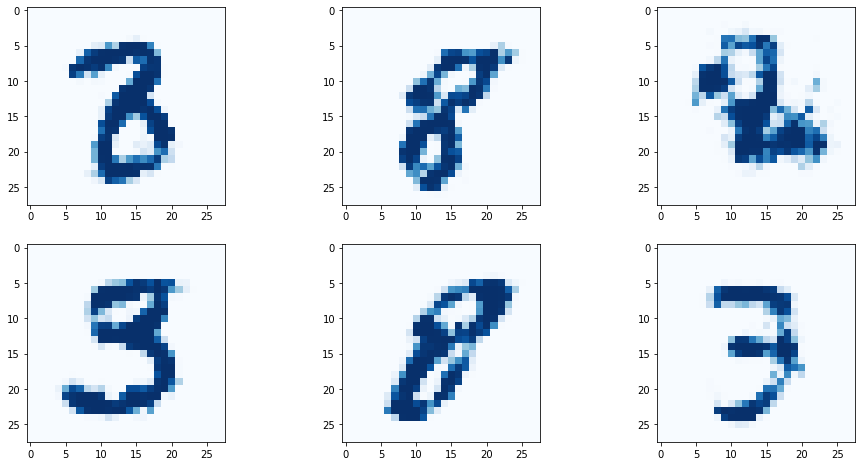

In [ ]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

모드 붕괴를 막기 위한 궁극적인 해결책이 randn()을 생성기의 시드에 사용하는 것일까?
단순한 1010 GAN에서는 randn() 만 사용을 해도 모드 붕괴를 해결한 것이 아니라, LeakyReLU(), LayerNorm(), BCELoss() 등 다양한 방법들을 결합해 문제를 해결했다.

간단한 1010 GAN 모델에서 목격했던 판별기와 생성기 간의 오묘한 균현이 왜 지금의 모델에서는 나타나지 않았을까? 

손실 차트에 따르면 판별기 손실은 0으로 급격하게 떨어진 후에 유지되고, 생성기의 손실은 높게 머물러 있다. 하지만 **실제 프로덕션 수준**에서 GAN은 이 정도의 **균형을 맞추기 어렵다** 균형을 맞추지 않더라고 실제 수준에서 GAN은 어느정도 괜찮은 이미지를 만들어냈다. **GAN의 진정한 목적은 진짜처럼 보이게 하는 이미지를 생산해내는 것이다.**

### 시드로 실험하기

지금까지 생성기에 임의의 숫자를 넣는 시드만을 생각했다. 시드의 재미있는 특성을 보고 가자.

seed1과 seed2 가 있다고 가정하자. 이 두개의 시드에서 이미지를 만들어낼 수 있다. 만약, seed1과 seed2 의 중간 값을 가지는 시드는 어떤 이미지를 생성해낼까?

만약, seed1과 seed2 사이에서 일정한 간격으로 시드를 생성한다면 어떤 결과가 나올까?

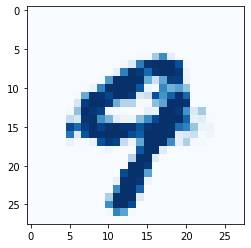

In [ ]:
seed1 = generate_random_seed(100)
out1 = G.forward(seed1)
img1 = out1.detach().numpy().reshape(28, 28)
plt.imshow(img1, interpolation='none', cmap='Blues')

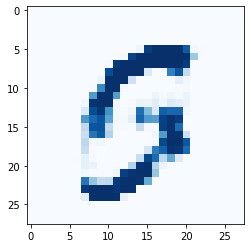

In [ ]:
seed2 = generate_random_seed(100)
out2 = G.forward(seed2)
img2 = out2.detach().numpy().reshape(28, 28)
plt.imshow(img2, interpolation='none', cmap="Blues")

seed1 과 seed2 사이의 일정한 간격의 12개의 시드를 구하는 코드

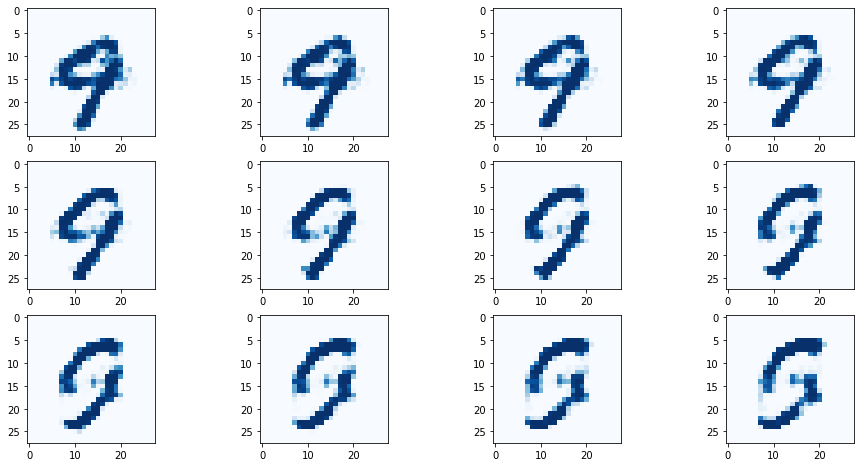

In [ ]:
# seed1과 seed2 사이의 일정한 간격의 12개의 시드를 구하는 코드

count = 0

f, axarr = plt.subplots(3, 4, figsize=(16, 8))

for i in range(3):
    for j in range(4):
        seed = seed1 + (seed2 - seed1) / 11 * count
        output = G.forward(seed)
        img = output.detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation='none', cmap='Blues')
        count = count + 1
        pass
    pass

시드끼리 더하는 코드

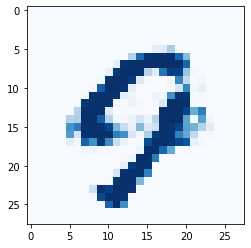

In [ ]:
seed3 = seed1 + seed2
out3 = G.forward(seed3)
img3 = out3.detach().numpy().reshape(28, 28)
plt.imshow(img3, interpolation='none', cmap="Blues")

**시드끼리의 합은 각 이미지를 합친 이미지를 생성해낸다**

시드끼리 빼는 코드

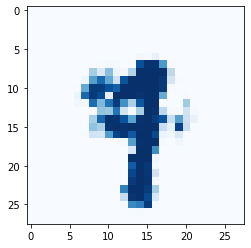

In [ ]:
seed4 = seed1 - seed2
out4 = G.forward(seed4)
img4 = out4.detach().numpy().reshape(28,28)
plt.imshow(img4, interpolation='none', cmap='Blues')

시드끼리 차의 결과는 겹치는 부분을 뺀 결과가 **아니다.** 

### Summary

- **단색 이미지**를 대상으로 작업하는 것은 신경망의 디자인을 바꿀 필요가 없다. 2차원 행렬의 픽셀 값들은 아주 쉽게 1차원 행렬의 값으로 바꿀 수 있고, 이를 판별기에 입력하면 된다. 픽셀의 순서는 중요하지 않고 **일관성**만 있으면 된다. 

- **모드 붕괴**는 다른 선택지가 있어도 계속해서 하나의 클래스로만 생성기가 숫자를 생성하는 현상을 말한다. 모드 붕괴는 GAN 훈련에서 제일 골치 아픈 문제이다. 이런 현상이 일어나는 이유와 해결책은 아직까지 활발히 연구되고 있다.

- GAN을 설계하기 위한 가장 좋은 시작점은 생성기와 판별기를 같은 구조로 만들어 한쪽이 과도하게 성능이 좋아져버리는 현상을 방지하는 것이다.

- 훈련에서는 양보다 질이 중요하다.

- 두 시드 값 사이의 시드의 숫자는 중간 정도로 보간된 이미지가 나온다.

- 시디끼리의 합에서 도출된 이미지는 두 이미지를 합친 것이다. 차에서 도출된 이미지는 어떤 직관적인 패턴을 따르지 않는다.

- MSE의 경우 손실의 이상적인 값은 0.25이고, BCE의 경우 ln(2), 0.69이다.

## Chapter 08 얼굴 이미지

GAN을 통해 사람의 얼굴을 생성해보자.

단색 숫자 이미지를 생성하는 거보다 어려운 새로운 도전 두 가지가 있다.

- 풀컬러 이미지를 훈련하고, 풀컬러 이미지를 생성해야 한다.

- 사진의 훈련 데이터셋을 이용해 다양한고 그럴듯한 결과를 얻어내야 한다.

### 컬러 이미지

디지털 이미지에서 색을 표현하는 대표적인 방법은 RGB의 색을 섞는 것이다. 

사진은 이 RGB를 조합한 것으로 색이 표현되는데, **빨강, 초록, 파랑색이 크기가 같은 행렬에 각각 저장된다.**

전의 단색 이미지를 표현할 때는 28x28 크기의 행렬을 이용했다. 컬러 이미지를 표현할 때는 28x28 크기의 배열 3개를 합쳐야 표현할 수 있다. **각 행렬에 저장되는 값들은 빨간색값, 파란색, 초록색을 표현하는 값이다.**

컬러 이미지를 표현하기 위해 3차원으로 표현된 행렬 or 텐서를 사용한다면. 한 차원은 이미지의 높이, 다른 한차원은 이미지의 너비, 3번째 차원은 값이 항상 3인데, 이유는 빨강, 초록, 파랑의 세 개의 레이어가 있기 때문이다.

### CelebA 데이터셋

GAN 훈련에서 가장 큰 난관은 훈련에 필요한 충분한 이미지를 확보하는 것이다. 

유명하고 인기 있는 CelebA 데이터셋은 202,599개의 유명인 얼굴 이미지가 있다. 눈과 입의 위치가 비슷한 좌표에 위치하도록 어느 정도 조정(align)된 이미지도 제공되는데 이를 사용할 것이다.

이 데이터셋은 비상업적, 연구, 교육용으로 사용해야 한다. 

### 계층적 이미지 형식

CelebA dataset은 수천 개의 이미지가 JPEG 포멧으로 저장되어 있다.
파일을 폴더에 풀고 GAN 코드가 훈련 과정에서 알아서 이미지를 열고 닫게 할 것이다. 

순차적으로 이미지를 열고 닫는것도 동작은 하지만 시간이 오래 걸려 효율적인 방법이 아니다.

성능 문제를 해결하기 위해 데이터를 특정 형식으로 바꾸면 접근에 용이하고 반복에도 강하다.
HDF5라는 포멧을 이용하자.

HDF5는 5는 버전을 이야기하고 **HDF는 계층적 데이터 형식(Hierarchical Data Format)** 이다. 이 포멧을 용량이 큰 데이터에 효과적으로 접근하기 위해 만들어진 데이터 형식이다. 

HDF5 패키지가 계층적이라고 불리는 이융는, 하나 이상의 그룹을 가질 수 있기 때문이다. 그룹 안에서 여러 개의 데이터셋이 포함될 수 있으며 그룹안에 그룹이 존재할 수 있다. 이 포멧은 폴더 구조와 비슷하다.

In [8]:
cd /content/drive/MyDrive/workspace/GAN/GAN\ 첫걸음/celeba_dataset

/content/drive/MyDrive/workspace/GAN/GAN 첫걸음/celeba_dataset


In [9]:
!pwd

/content/drive/MyDrive/workspace/GAN/GAN 첫걸음/celeba_dataset


In [10]:
import torchvision

mnist_dataset = torchvision.datasets.CelebA(root='.', download=True)

BadZipFile: ignored

In [11]:
import h5py
import zipfile
import imageio
import os

In [14]:
%%time


hdf5_file = '/content/drive/MyDrive/workspace/GAN/GAN 첫걸음/celeba_dataset/celeba/celeba_aligned_small.h5py'

# how many of the 202,599 images to extract and package into HDF5
total_images = 20000

with h5py.File(hdf5_file, 'w') as hf:

    count = 0

    with zipfile.ZipFile('/content/drive/MyDrive/workspace/GAN/GAN 첫걸음/celeba_dataset/img_align_celeba_20000.zip', 'r') as zf:
      for i in zf.namelist():
        if (i[-4:] == '.jpg'):
          # extract image
          ofile = zf.extract(i)
          img = imageio.imread(ofile)
          os.remove(ofile)

          # add image data to HDF5 file with new name
          hf.create_dataset('img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
          
          count = count + 1
          if (count%1000 == 0):
            print("images done .. ", count)
            pass
            
          # stop when total_images reached
          if (count == total_images):
            break
          pass

        pass
      pass

images done ..  1000
images done ..  2000
images done ..  3000
images done ..  4000
images done ..  5000
images done ..  6000
images done ..  7000
images done ..  8000
images done ..  9000
images done ..  10000
images done ..  11000
images done ..  12000
images done ..  13000
images done ..  14000
images done ..  15000
images done ..  16000
images done ..  17000
images done ..  18000
images done ..  19000
images done ..  20000
CPU times: user 3min 17s, sys: 20.2 s, total: 3min 37s
Wall time: 7min 15s


### 데이터 살펴보기

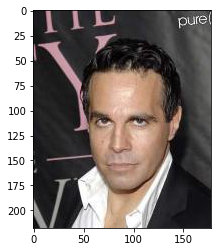

In [4]:
import h5py

import numpy
import matplotlib.pyplot as plt


with h5py.File('/content/drive/MyDrive/workspace/GAN/GAN 첫걸음/celeba_dataset/celeba_aligned_small.h5py', 'r') as file_object:
    dataset = file_object['img_align_celeba']  # 내부 데이터로 접근 가능
    image = numpy.array(dataset['7.jpg'])  # 개별적인 이미지도 접근 가능
    plt.imshow(image, interpolation='none')
    pass

In [8]:
image.shape # 색 정보 (높이: 218 픽셀, 너비: 178, RGB)

(218, 178, 3)

### 데이터셋 클래스

데이터셋 클래스를 수정하자

Dataset 클래스에서 데이터셋을 상속받을 때는 두 가지 특수 메서드를 구현해야한다.

- \__len__(): 데이터셋의 길이를 반환하다.

- \__getitem__(): 데이터셋의 n번째 아이템을 반환한다.

MnistDataset 클래스를 만들고 __len__() 메서드를 구현하면 Pytorch는 len(mnist_dataset)을 통해 데이터셋의 크기를 알 수 있다. 

__getitem__()은 mnist_dataset[3] 처럼 특정 아이템을 index를 통해 접근 가능하게 한다.

In [13]:
from torch.utils.data import Dataset

In [15]:
class CelebADataset(Dataset):
    def __init__(self, file):
        self.file_object = h5py.File(file, 'r')
        self.dataset = self.file_object['img_align_celeba']
        pass

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        if (index >= len(self.dataset)):
            raise IndexError()
        img = numpy.array(self.dataset[str(index)+'.jpg'])
        return torch.cuda.FloatTensor(img) / 255.0

    def plot_image(self, index):
        plt.imshow(numpy.array(self.dataset[str(index)+'.jpg']), 
                   interpolation='nearest')
        pass

생성자 __init__()는 HDF5 파일 열고 img_align_celeba로 각각의 이미지에 접근 가능하게 한다. 

__len__() 메서드는 len()이 그룹 안의 데이터 개수를 반환한다.

__getitem__() 메서드는 index를 이미지의 이름으로 변환해 이미지 데이터를 반환하는 기능을 한다. 그리고 numpy matrix의 값을 255.0으로 나눈 값, 즉 0 ~ 1 사이의 값을 넣는다.

실제 데이터셋의 아이템 수보다 인덱스가 많을 시 IndexError를 발생시킨다.

실행하기 전에 데이터의 형태를 확인하는 것은 좋은 습관이다. 

MNIST 데이터셋에서 했던 것처럼 plot_image()를 통해 확인해보자

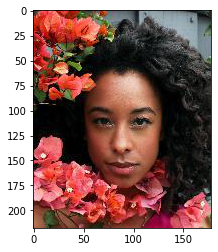

In [21]:
# 데이터 객체 생성
celeba_dataset = CelebADataset('/content/drive/MyDrive/workspace/GAN/GAN 첫걸음/celeba_dataset/celeba_aligned_small.h5py')

# 데이터 확인
celeba_dataset.plot_image(43) # index: 0 ~ 19999

### 판별기

역할: 이미지가 진짜인지 가짜인지 분류한다. 

image.shape = (218, 178, 3)

218 x 178 x 3 (116,412개)입력 노드가 필요

116,412 개의 값을 어떻게 정렬해서 판별기에 투입할까?

MINST에서는 데이터셋에 들어 있는 순서 그대로 값을 투입했다. 값들은 이미지의 행을 따라서 연속으로 들어 있는 각 픽셀 값이었기 때문에 행의 끝에 이르면 다음 행으로 자연스럽게 이어졌다. 

완전 연결 신경망(fully connected neural network)이기 때문에 **일관된 기준만 있따면 정렬을 크게 중요하지 않다.** 한 레이어의 모든 노드는 다음 레이어의 모든 노드와 연결되어 있기 때문이다. 

풀컬러 이미지에 대해서 이와 비슷한 과정으로 진행 가능하다. 픽셀을 나열하거나 형태를 바꿔 218 x 178 x 3 텐서 이미지를 길이 116,412의 1차원 텐서로 바꾸고 이를 완전 연결망에 투입하면 된다.

**이미지를 어떻게 풀어 일렬로 만드는지 중요하지 않다. 한 가지 기준을 정하고 판별기에 투입할 때마다 같은 방식을 유지 하기만 하면 된다.**

In [37]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
if torch.cuda.is_available():
  torch.set_default_tensor_type(torch.cuda.FloatTensor)
  print("using cuda:", torch.cuda.get_device_name(0))
  pass

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

using cuda: Tesla P100-PCIE-16GB


device(type='cuda')

In [53]:
def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data

In [54]:
def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

In [55]:
class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape,

    def forward(self, x):
        return x.view(*self.shape)

In [60]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            View(218*178*3),  # 3차원 이미지 텐서를 1차원 형태의 텐서로 변환
            nn.Linear(3*218*178, 100),
            nn.LeakyReLU(),
            nn.LayerNorm(100),
            nn.Linear(100, 1),
            nn.Sigmoid()
        )

        self.loss = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        if (self.counter % 10000 == 0):
            print("counter = 0 ", self.counter)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass

    pass

### 판별기 테스트하기

In [61]:
%%time

D = Discriminator()
D.to(device)

for image_data_tensor in celeba_dataset:
    D.train(image_data_tensor, torch.cuda.FloatTensor([1.0])) # 실제 데이터
    D.train(generate_random_image((218, 178, 3)), torch.cuda.FloatTensor([0.0])) # 생성 데이터
    pass

counter = 0  10000
counter = 0  20000
counter = 0  30000
counter = 0  40000
CPU times: user 2min 30s, sys: 7.73 s, total: 2min 37s
Wall time: 2min 37s


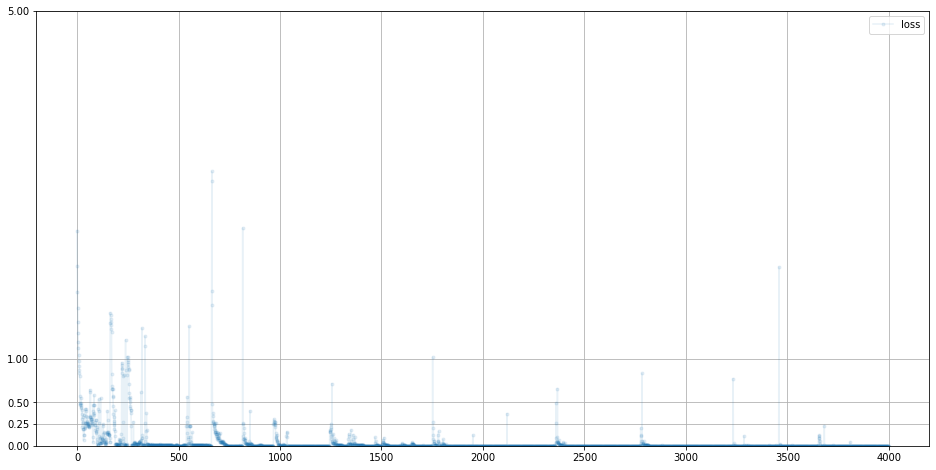

In [62]:
D.plot_progress()

### 생성기

3차원 텐서 (218, 178, 3) 크기로 결과를 내어주도록 바꾸어야 한다.

In [64]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(100, 3*10*10), 
            nn.LeakyReLU(),
            nn.LayerNorm(3*10*10),
            nn.Linear(3*10*10, 3*218*178),
            nn.Sigmoid(),
            View((218,178,3))
        )

        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)

        loss = D.loss(d_output, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    
    pass        

### 생성기 결과 확인하기

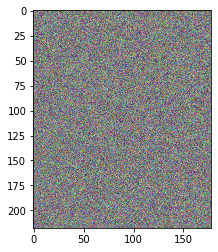

In [67]:
G = Generator()
G.to(device)

output = G.forward(generate_random_seed(100))
img = output.detach().cpu().numpy()
plt.imshow(img, interpolation='none', cmap="Blues")

훈련되지 않은 생성기는 아무 패턴이 없는 임의의 데이터를 만들어낸다.

### GAN 훈련하기

In [68]:
%%time

D = Discriminator().to(device)
G = Generator().to(device)

epochs = 1

for epoch in range(epochs):
    print("epoch = ", epoch + 1)

    for image_data_tensor in celeba_dataset:
        D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
        D.train(G.forward(generate_random_seed(100)).detach(), torch.cuda.FloatTensor([0.0]))
        G.train(D, generate_random_seed(100), torch.cuda.FloatTensor([1.0]))
        pass
    pass

epoch =  1
counter = 0  10000
counter = 0  20000
counter = 0  30000
counter = 0  40000
CPU times: user 4min 57s, sys: 8.08 s, total: 5min 5s
Wall time: 5min 4s


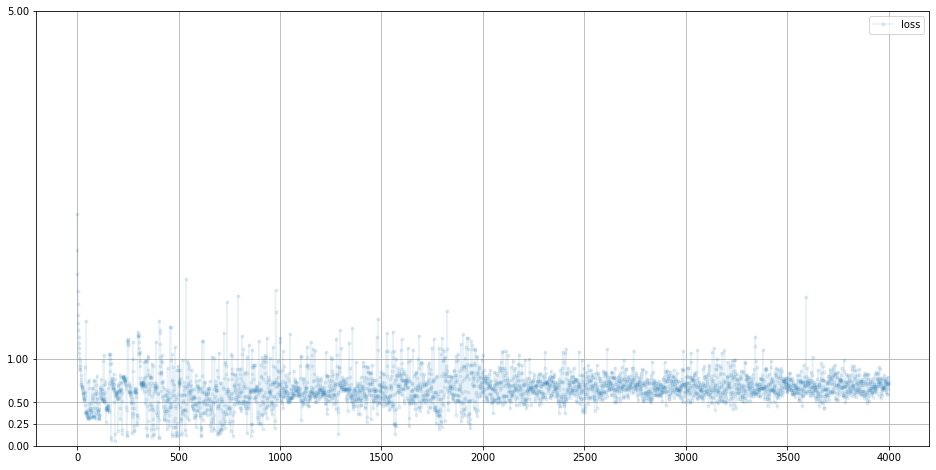

In [69]:
D.plot_progress()

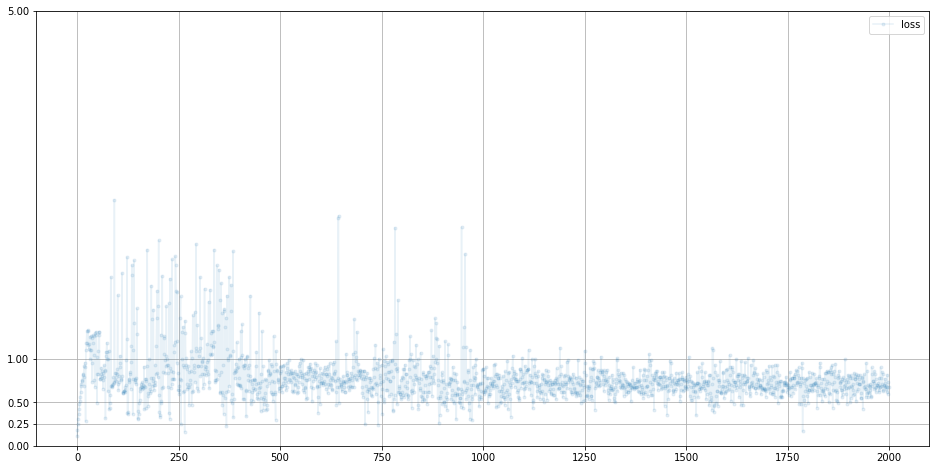

In [70]:
G.plot_progress()

판별기, 생성기 모두 BCELoss의 이상적인 손실인 ln(2), 0.69에 수렴한다.

생성기를 통해 나온 이미지들을 보자

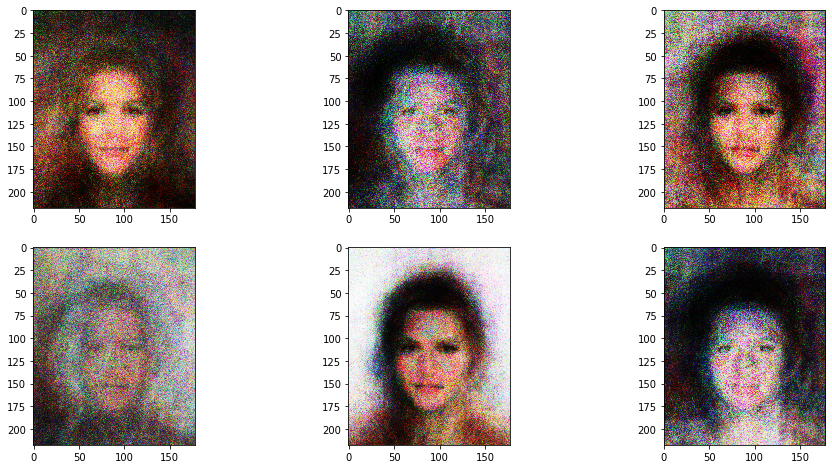

In [71]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().cpu().numpy()
        axarr[i, j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

조금 더 선명한 이미지를 위해 epoch을 증가시켜 학습해보자

In [72]:
%%time

D = Discriminator().to(device)
G = Generator().to(device)

epochs = 6

for epoch in range(epochs):
    print("epoch = ", epoch + 1 )
    
    for image_data_tensor in celeba_dataset:
        D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
        D.train(G.forward(generate_random_seed(100)).detach(), torch.cuda.FloatTensor([0.0]))
        G.train(D, generate_random_seed(100), torch.cuda.FloatTensor([1.0]))
        pass

    pass

epoch =  1
counter = 0  10000
counter = 0  20000
counter = 0  30000
counter = 0  40000
epoch =  2
counter = 0  50000
counter = 0  60000
counter = 0  70000
counter = 0  80000
epoch =  3
counter = 0  90000
counter = 0  100000
counter = 0  110000
counter = 0  120000
epoch =  4
counter = 0  130000
counter = 0  140000
counter = 0  150000
counter = 0  160000
epoch =  5
counter = 0  170000
counter = 0  180000
counter = 0  190000
counter = 0  200000
epoch =  6
counter = 0  210000
counter = 0  220000
counter = 0  230000
counter = 0  240000
CPU times: user 29min 38s, sys: 49.3 s, total: 30min 28s
Wall time: 30min 20s


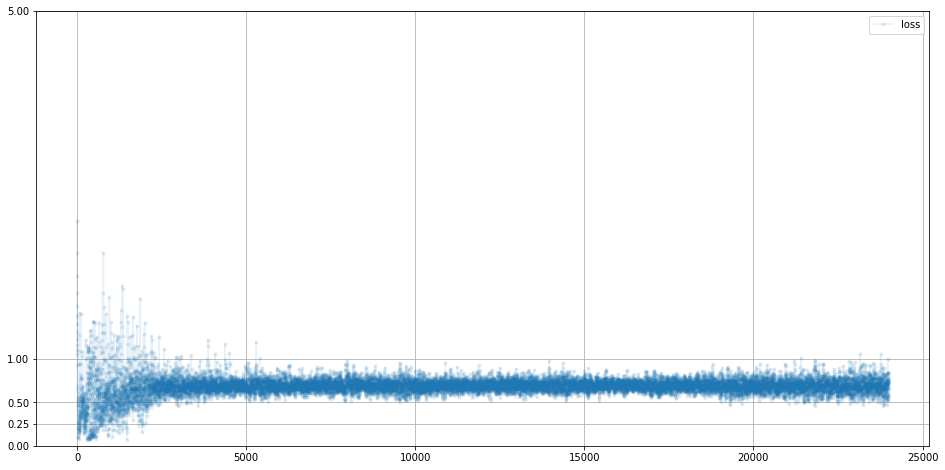

In [73]:
D.plot_progress()

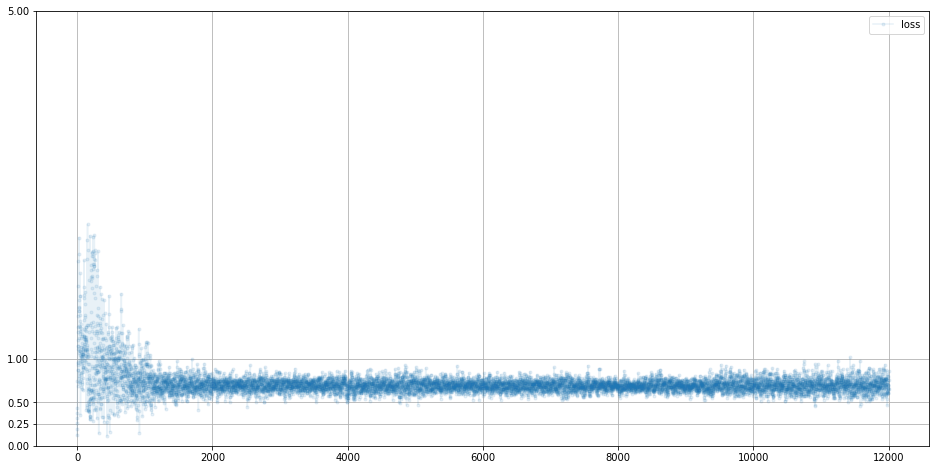

In [74]:
G.plot_progress()

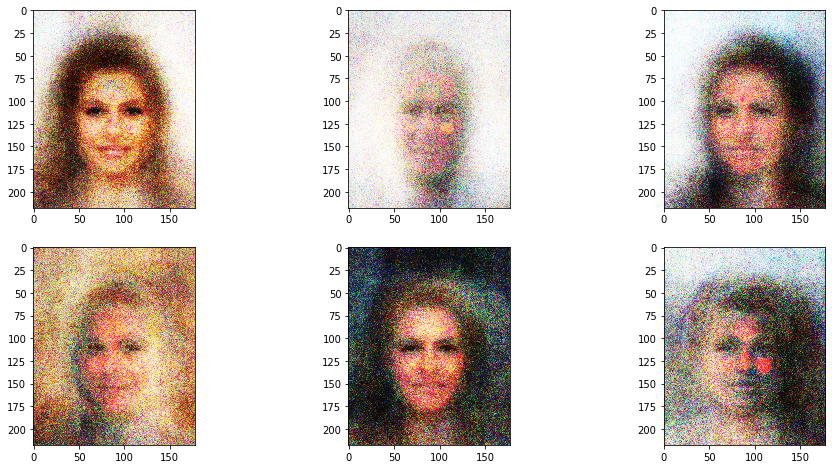

In [75]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().cpu().numpy()
        axarr[i, j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

생성기가 생성하는 이미지의 다양성에 대해 한 가지 의문이 든다.

생성기가 정말로 무엇인가를 학습한 것인가?

생성기는 직접 이미지를 보고 배운 것이 아니라 얼굴의 전체적인 형태나 눈, 코 등의 세세한 **특징을 기억하지 못한다.**

**생성기가 배운 것은 이미지를 생성할 때 훈련 데이터의 우도(가능도)이다.**

### Summary

- 색상은 빨강, 초록, 파랑 값으로 모델링 된다. 세 개의 레이어에 담긴 픽셀 값들은 행렬로 표현이 되는데, 각 레이어는 빨강, 초록, 파랑 채널을 나타내며, 형태는 보통 (높이, 너비, 3)이다. 

- HDF를 이용하면 좀 더 효율적으로 파일을 다룰 수 있다.

- **GAN은 훈련 데이터를 기억하지 않는다.** 단순히 복사하여 붙여넣는 것도 아니다. GAN은 훈련 데이터의 **확률분포(Probability Distribution)을 파악하고 이를 재현한 데이터를 생성하기 위해 노력한다.**